# Experimental Evaluation

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../..")
import timexplain as tx
import experiments.base as ex

In [2]:
eval_metrics = ex.evaluation_metrics()

In [3]:
# Select final fidelity and informativeness values.
fidelity_mat = eval_metrics[(eval_metrics["evaluator"] == "fidelity")        & (eval_metrics["integral_up_to"] == 9)]
informat_mat = eval_metrics[(eval_metrics["evaluator"] == "informativeness") & (eval_metrics["integral_up_to"] == 100)]

# Compute the average for each classifier/explainer combination.
fidelity_mat = fidelity_mat.groupby(["classifier", "explainer"])["value"].mean().unstack()
informat_mat = informat_mat.groupby(["classifier", "explainer"])["value"].mean().unstack()

# In the fidelity matrix, shift each classifier (column) such that the maximum is 1.
fidelity_mat = (fidelity_mat.T - fidelity_mat.T.max() + 1).T

# Reorder classifiers (rows).
clf_order = ["time_series_forest", "shapelet_transform", "sax_vsm", "weasel", "rotation_forest", "svm_linear", "resnet"]
fidelity_mat = fidelity_mat.reindex(clf_order)
informat_mat = informat_mat.reindex(clf_order)

# Reorder + select explainers (columns).
shap_order = fidelity_mat.loc[:, fidelity_mat.columns.str.startswith("shap_")].mean().sort_values(ascending=False).index.tolist()
fidelity_mat = fidelity_mat[shap_order + ["shapelet_superpos_divide_spread", "sax_vsm_word_superpos_divide_spread", "weasel_word_superpos_divide_spread", "tree_shap", "neural_cam"]]
informat_mat = informat_mat[shap_order + ["shapelet_superpos",               "sax_vsm_word_superpos",               "weasel_word_superpos",               "tree_shap", "neural_cam"]]

In [4]:
# Select the fidelity values for SHAP explainers.
fidelity_prog = eval_metrics[(eval_metrics["evaluator"] == "fidelity") & (eval_metrics["explainer"].str.startswith("shap_"))]

# Compute the average for each explainer/integral_up_to combination.
fidelity_prog = fidelity_prog.groupby(["explainer", "integral_up_to"])["value"].mean().unstack()

# z-normalize each step of integral_up_to (column).
fidelity_prog = (fidelity_prog - fidelity_prog.mean()) / (fidelity_prog.std())

# Switch rows and columns.
fidelity_prog = fidelity_prog.T

# Reorder explainers (columns) to reflect the rightmost order of the progression curves.
fidelity_prog = fidelity_prog[shap_order]

## Plot fidelity and informativeness matrices

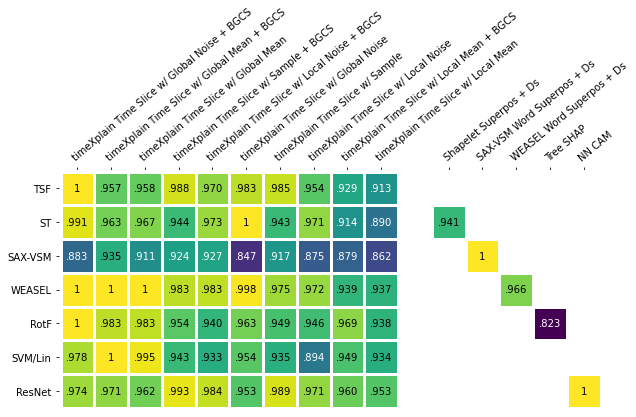

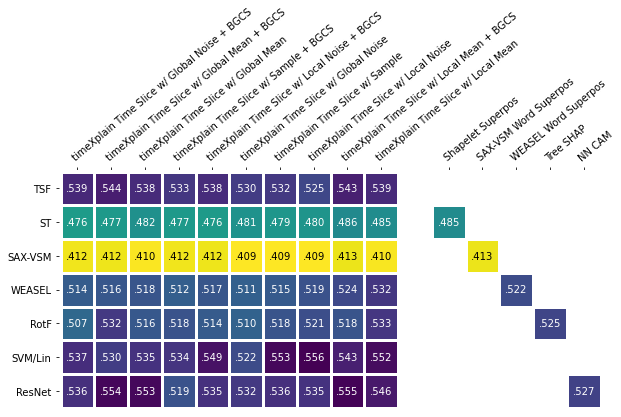

In [5]:
row_labels = [ex.CLASSIFIER_NAMES_TO_LABELS[n] for n in fidelity_mat.index]

tx.plot.matrix(fidelity_mat.values, row_labels, [ex.EXPLAINER_NAMES_TO_LABELS[n] for n in fidelity_mat.columns],
               col_seps=10, cmap="viridis",   omit_leading_zero=True, trailing_zeros=True, cbar=False)
tx.plot.matrix(informat_mat.values, row_labels, [ex.EXPLAINER_NAMES_TO_LABELS[n] for n in informat_mat.columns],
               col_seps=10, cmap="viridis_r", omit_leading_zero=True, trailing_zeros=True, cbar=False)

## Plot informativeness progression

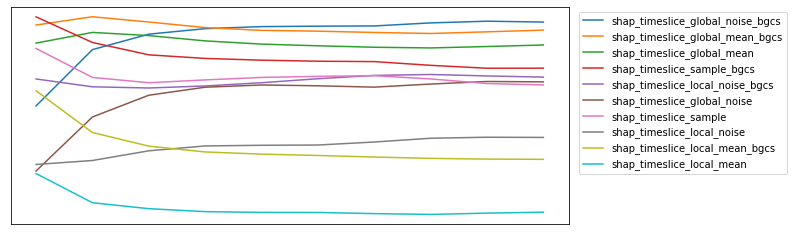

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
lines = ax.plot(fidelity_prog)
ax.legend(lines, fidelity_prog.columns, loc="upper left", bbox_to_anchor=(1.01, 1));

## Print fidelity and informativeness matrix data

In [7]:
np.set_printoptions(linewidth=200)

In [8]:
print(str(fidelity_mat.columns.tolist()).replace("'", '"'))

["shap_timeslice_global_noise_bgcs", "shap_timeslice_global_mean_bgcs", "shap_timeslice_global_mean", "shap_timeslice_sample_bgcs", "shap_timeslice_local_noise_bgcs", "shap_timeslice_global_noise", "shap_timeslice_sample", "shap_timeslice_local_noise", "shap_timeslice_local_mean_bgcs", "shap_timeslice_local_mean", "shapelet_superpos_divide_spread", "sax_vsm_word_superpos_divide_spread", "weasel_word_superpos_divide_spread", "tree_shap", "neural_cam"]


In [9]:
print(str(informat_mat.columns.tolist()).replace("'", '"'))

["shap_timeslice_global_noise_bgcs", "shap_timeslice_global_mean_bgcs", "shap_timeslice_global_mean", "shap_timeslice_sample_bgcs", "shap_timeslice_local_noise_bgcs", "shap_timeslice_global_noise", "shap_timeslice_sample", "shap_timeslice_local_noise", "shap_timeslice_local_mean_bgcs", "shap_timeslice_local_mean", "shapelet_superpos", "sax_vsm_word_superpos", "weasel_word_superpos", "tree_shap", "neural_cam"]


In [10]:
print(str(fidelity_mat.index.tolist()).replace("'", '"'))

["time_series_forest", "shapelet_transform", "sax_vsm", "weasel", "rotation_forest", "svm_linear", "resnet"]


In [11]:
print(repr(fidelity_mat.values).replace("   nan", "np.nan"))

array([[1.        , 0.95668374, 0.95793732, 0.98771206, 0.97032623, 0.98264007, 0.98503615, 0.95421988, 0.92935079, 0.91305272,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
       [0.99121889, 0.96337788, 0.96660224, 0.94398611, 0.97349482, 1.        , 0.94256233, 0.97101929, 0.91358241, 0.89034299, 0.94109161,     np.nan,     np.nan,     np.nan,     np.nan],
       [0.8825423 , 0.93489662, 0.91067008, 0.92393369, 0.92658359, 0.8468997 , 0.91708908, 0.87462472, 0.8787667 , 0.8623328 ,     np.nan, 1.        ,     np.nan,     np.nan,     np.nan],
       [0.99950129, 1.        , 0.99996382, 0.98259676, 0.98287225, 0.99804897, 0.97500369, 0.97247307, 0.93927869, 0.9371904 ,     np.nan,     np.nan, 0.96553852,     np.nan,     np.nan],
       [1.        , 0.98253227, 0.98295688, 0.95446134, 0.94038863, 0.96325505, 0.94885586, 0.94593984, 0.96934906, 0.93785677,     np.nan,     np.nan,     np.nan, 0.82318224,     np.nan],
       [0.97838757, 1.        , 0.99522311, 0.94317646,

In [12]:
print(repr(informat_mat.values).replace("   nan", "np.nan"))

array([[0.53931564, 0.54380072, 0.53828715, 0.53255452, 0.53797885, 0.53045072, 0.5318001 , 0.52498531, 0.54335446, 0.53886095,     np.nan,     np.nan,     np.nan,     np.nan,     np.nan],
       [0.47556095, 0.47685851, 0.48234414, 0.47715118, 0.47600365, 0.48117263, 0.47862028, 0.48012647, 0.48636346, 0.48461101, 0.48524014,     np.nan,     np.nan,     np.nan,     np.nan],
       [0.41195593, 0.41240131, 0.4096853 , 0.41207656, 0.41235447, 0.40868063, 0.4090366 , 0.4087391 , 0.41288568, 0.40984064,     np.nan, 0.41293263,     np.nan,     np.nan,     np.nan],
       [0.5137603 , 0.5161465 , 0.51771009, 0.51154627, 0.5169584 , 0.51112077, 0.51470214, 0.51944417, 0.52361646, 0.53244158,     np.nan,     np.nan, 0.52203275,     np.nan,     np.nan],
       [0.50656557, 0.53213115, 0.51572131, 0.5184082 , 0.51418197, 0.51021803, 0.51833115, 0.52082951, 0.51821803, 0.53290164,     np.nan,     np.nan,     np.nan, 0.52544965,     np.nan],
       [0.53694859, 0.52957836, 0.53483839, 0.53369213,

## Print fidelity progression data

In [13]:
print(str(fidelity_prog.columns.tolist()).replace("'", '"'))

["shap_timeslice_global_noise_bgcs", "shap_timeslice_global_mean_bgcs", "shap_timeslice_global_mean", "shap_timeslice_sample_bgcs", "shap_timeslice_local_noise_bgcs", "shap_timeslice_global_noise", "shap_timeslice_sample", "shap_timeslice_local_noise", "shap_timeslice_local_mean_bgcs", "shap_timeslice_local_mean"]


In [14]:
print(repr(fidelity_prog.values))

array([[-0.23301274,  1.10429872,  0.80520947,  1.23924866,  0.21237539, -1.30896431,  0.71673616, -1.2014271 ,  0.01691105, -1.3513753 ],
       [ 0.69767232,  1.24126678,  0.98220947,  0.81602503,  0.0828991 , -0.41598025,  0.23815087, -1.1356231 , -0.6727768 , -1.83384343],
       [ 0.95336772,  1.15404096,  0.92977131,  0.61144422,  0.06316803, -0.05626992,  0.15015224, -0.97538827, -0.89813442, -1.93215187],
       [ 1.04425415,  1.06181707,  0.84208791,  0.55207297,  0.0968443 ,  0.07627978,  0.19687823, -0.89485888, -0.99422019, -1.98115535],
       [ 1.07823005,  1.01622621,  0.78869576,  0.52318341,  0.15047906,  0.11297388,  0.23791703, -0.88392551, -1.03023443, -1.99354546],
       [ 1.08510215,  1.00282599,  0.76118458,  0.5057409 ,  0.2161361 ,  0.09986383,  0.25582032, -0.87976266, -1.05240912, -1.9945021 ],
       [ 1.08926618,  0.98140798,  0.73696616,  0.4996658 ,  0.27144665,  0.077267  ,  0.26614975, -0.83009311, -1.07830936, -2.01376705],
       [ 1.13947214,  0.964